# US Census Bureau

<img src="img/Census_Bureau.jpg" width="350" height="300"/>

O Departamento do Censo dos Estados Unidos (DCEU), oficialmente Bureau of the Census, é a principal agência governamental do sistema estatístico federal do país e responsável por produzir dados sobre a população e economia. O departamento faz parte do Departamento do Comércio e seu diretor é nomeado pelo presidente dos Estados Unidos.

Fonte: https://pt.wikipedia.org/wiki/Departamento_do_Censo_dos_Estados_Unidos

age: a idade de um indivíduo

workclass: Um termo geral para representar a situação de emprego de um indivíduo

fnlwgt: Peso final. Em outras palavras, esse é o número de pessoas que o censo acredita que a entrada representa

education: o nível mais alto de educação alcançado por um indivíduo

education-num: O mais alto nível de educação alcançado na forma numérica

marital-status: estado civil de um indivíduo. Married­civ­spouse corresponde a cônjuge civil, enquanto Cônjuge Married­AF­spouse é cônjuge das Forças Armadas

occupation: o tipo geral de ocupação de um indivíduo

relationship: representa o que esse indivíduo é em relação aos outros. Por exemplo, um indivíduo pode ser Marido. Cada entrada tem apenas um atributo de relacionamento e é um tanto redundante com o estado civil. Podemos nem fazer uso desse atributo;

race: Descrições da raça de um indivíduo

sex: o sexo biológico do indivíduo

capital-gain: ganhos de capital para um indivíduo

capital-loss: perda de capital para um indivíduo

hours-per-week: as horas que um indivíduo relatou trabalhar por semana

native-country: país de origem de um indivíduo

class: se um indivíduo ganha ou não mais de $ 50.000 por ano.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


plt.style.use('seaborn-darkgrid')

# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import psycopg2 as pg2

In [3]:
host = 'clicksign.cu2ukawrgpbw.us-east-1.rds.amazonaws.com'
port = 5432
db_name = 'postgres'
username = 'postgres'
password = 'clicksign'

# Create connection
conn = pg2.connect(host = host, port = port, dbname = db_name, user = username, password = password)

# Create a cursor object
cur = conn.cursor()

In [4]:
# executar query (criando tabela)

cur.execute("""SELECT * FROM clicksign;""")

In [5]:
cols = [ desc[0] for desc in cur.description]
tables_name = []
for i in cur:
    tables_name.append(i)

tables_name = pd.DataFrame(tables_name, columns = cols)
tables_name

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,id
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13,United-States,<=50K,2
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K,3
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40,United-States,<=50K,4
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40,Cuba,<=50K,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36,United-States,<=50K,48838
48838,64,null,321403.0,HS-grad,9,Widowed,null,Other-relative,Black,Male,0.0,0.0,40,United-States,<=50K,48839
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50,United-States,<=50K,48840
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40,United-States,<=50K,48841


In [6]:
df = tables_name

In [7]:
df.shape

(48842, 16)

In [8]:
df.describe()

,age,education_num,hours_per_week,id
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.641763,10.078089,40.421154,24421.500000
std,13.712688,2.570973,12.392477,14099.615261
min,0.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,40.000000,12211.250000
50%,37.000000,10.000000,40.000000,24421.500000
75%,48.000000,12.000000,45.000000,36631.750000
max,90.000000,16.000000,99.000000,48842.000000


## A maioria dos indivíduos do dataset possuem renda abaixo de 50K

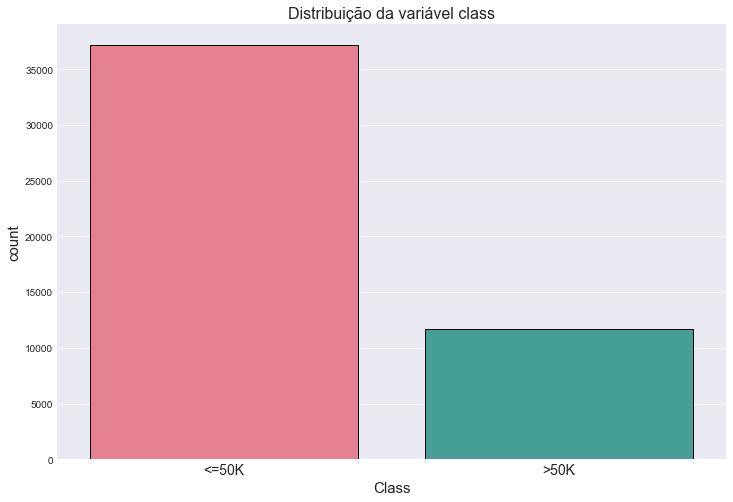

In [9]:
plt.figure(figsize=(12,8))

sns.countplot(x="class", data = df, palette ="husl" ,edgecolor="black")
plt.ylabel('count', fontsize=15)
plt.xlabel('Class', fontsize=15)
plt.xticks(ticks=[0,1], labels=['<=50K', '>50K'], fontsize=14)
plt.title('Distribuição da variável class', fontsize=16)
plt.show()

## A maioria dos indivíduos do dataset são do sexo de nascimento masculino

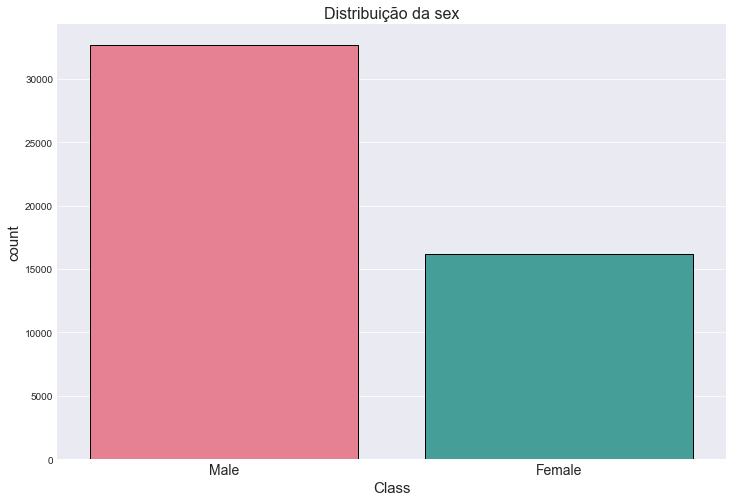

In [10]:
plt.figure(figsize=(12,8))

sns.countplot(x="sex", data = df, palette ="husl" ,edgecolor="black", color=['royalblue', 'pink'])
plt.ylabel('count', fontsize=15)
plt.xlabel('Class', fontsize=15)
plt.xticks(ticks=[0,1], labels=['Male', 'Female'], fontsize=14)
plt.title('Distribuição da sex', fontsize=16)
plt.show()

## A distribuição das idades está muito próxima de uma distribuição normal

In [11]:
# Limite inferior 5% e superior 95%

min_threshold, max_threshold = df['age'].quantile([0.05,0.95])
min_threshold, max_threshold

(19.0, 63.0)

In [12]:
# Quantidade de linhas abaixo de 5% e acima dos 95% 

df[df['age']<min_threshold].count()[0], df[df['age']>max_threshold].count()[0]

(1459, 2427)

### Eliminando outliers

In [13]:
df2 = df[(df.age > min_threshold) & (df.age < max_threshold)].copy()
df2.shape

(43568, 16)

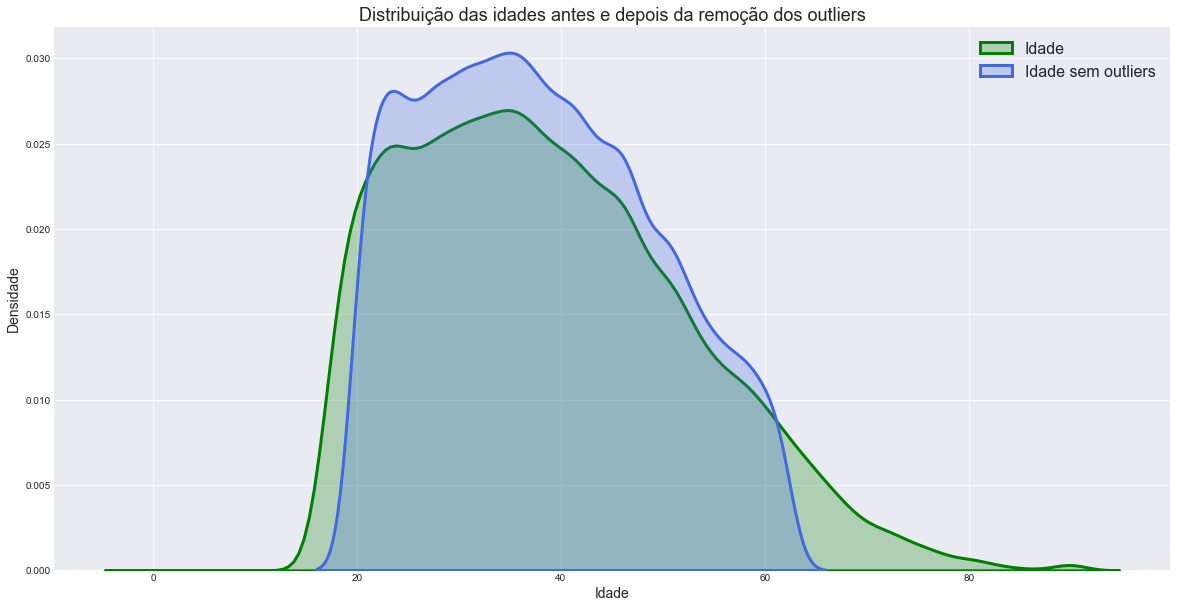

In [14]:
plt.figure(figsize=(20,10))

sns.distplot(df['age'], hist = False, kde = True,color="green", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df2['age'], hist = False, kde = True, color="royalblue", kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Distribuição das idades antes e depois da remoção dos outliers', fontsize=18)
plt.legend(['Idade', 'Idade sem outliers'], fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.show()

In [15]:
df2['age'].describe()

count    43568.000000
mean        37.894120
std         11.188005
min         20.000000
25%         29.000000
50%         37.000000
75%         46.000000
max         62.000000
Name: age, dtype: float64

# Hipóteses visando gerar insights e ampliar o conhecimento sobre a base de dados
As hipóteses são formuladas sem olhar os dados com o intuito de não ser tendencioso


**H1:** A maioria dos indivíduos trabalham na iniciativa privada 

**H2:** Mulheres possuem menos ganhos anuais

**H3:** Negros e outras minorias possuem menos ganhos anuais

**H4:** Os anos de escola não necessariamente influenciam nos ganhos anuais

**H5:** Maior número de horas de trabalho por semana não necessariamente indicam maiores ganhos

**H6:** Profissões ligadas a área de tecnologia proporcionam maiores ganhos

**H7:** Indivíduos com alguma relação com as forças armadas possuem maiores ganhos anuais

**H8:** Indivíduos fora de um relacionamento possuem maiores ganhos

**H9:** Indivíduos americanos possuem maiores ganhos comparados a outras nacionalidades

## **H1:** A maioria dos indivíduos trabalham na iniciativa privada --> VERDADEIRO

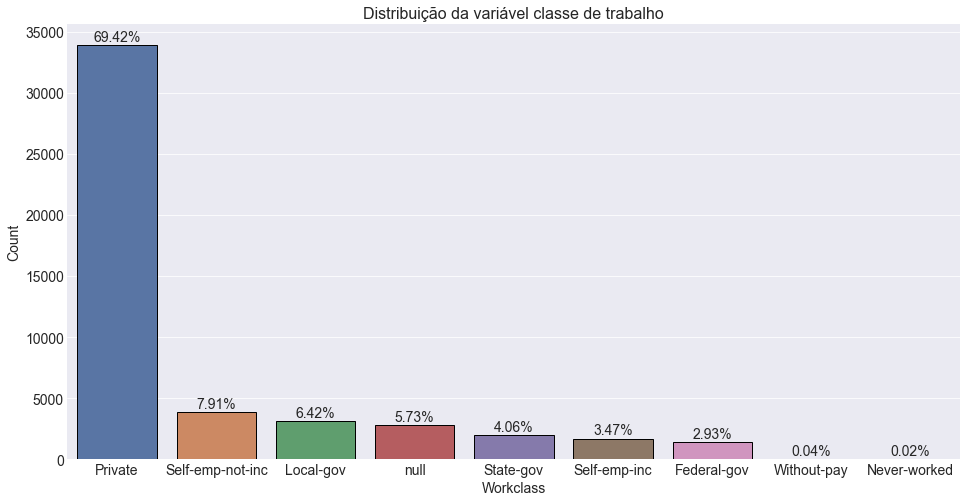

In [16]:
plt.subplots(figsize=(16,8))

count=sns.countplot(df['workclass'], order = df['workclass'].value_counts()[0:20].index, edgecolor='black', palette='deep')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Distribuição da variável classe de trabalho', fontsize=16)
plt.xlabel('Workclass', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## **H2:** Mulheres possuem menos ganhos anuais --> VERDADEIRO

In [17]:
df['capital_gain'] = df['capital_gain'].astype(float)

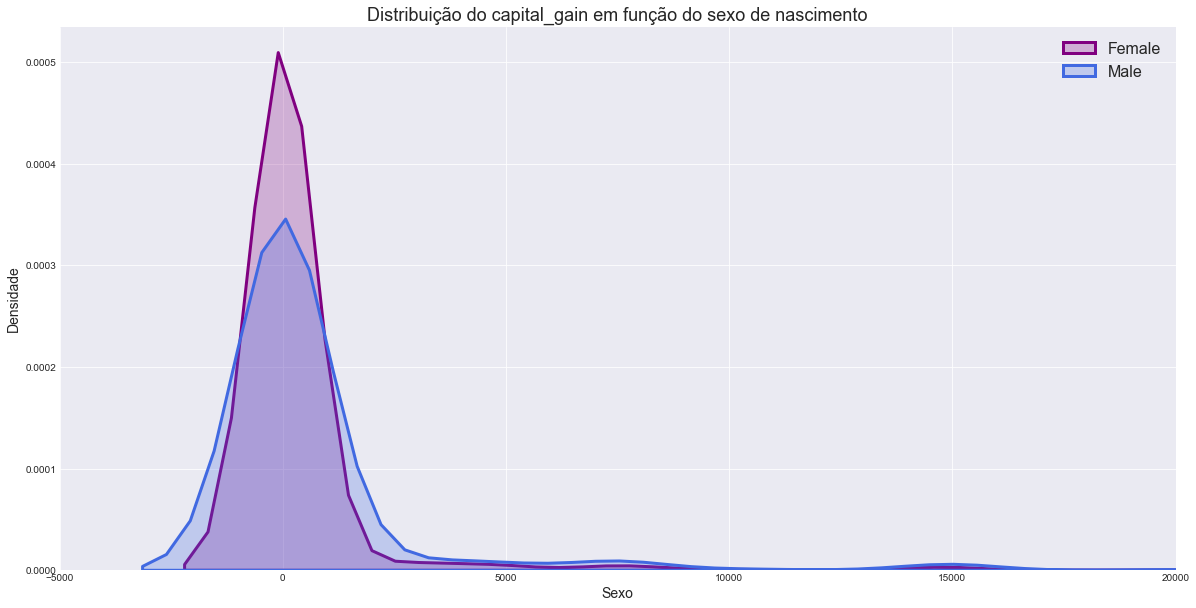

In [18]:
plt.figure(figsize=(20,10))

sns.distplot(df[df['sex']=='Female']['capital_gain'], hist = False, kde = True,color="purple", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['sex']=='Male']['capital_gain'], hist = False, kde = True, color="royalblue", kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Distribuição do capital_gain em função do sexo de nascimento', fontsize=18)
plt.legend(['Female', 'Male'], fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.xlim(-5000,20000)
plt.show()

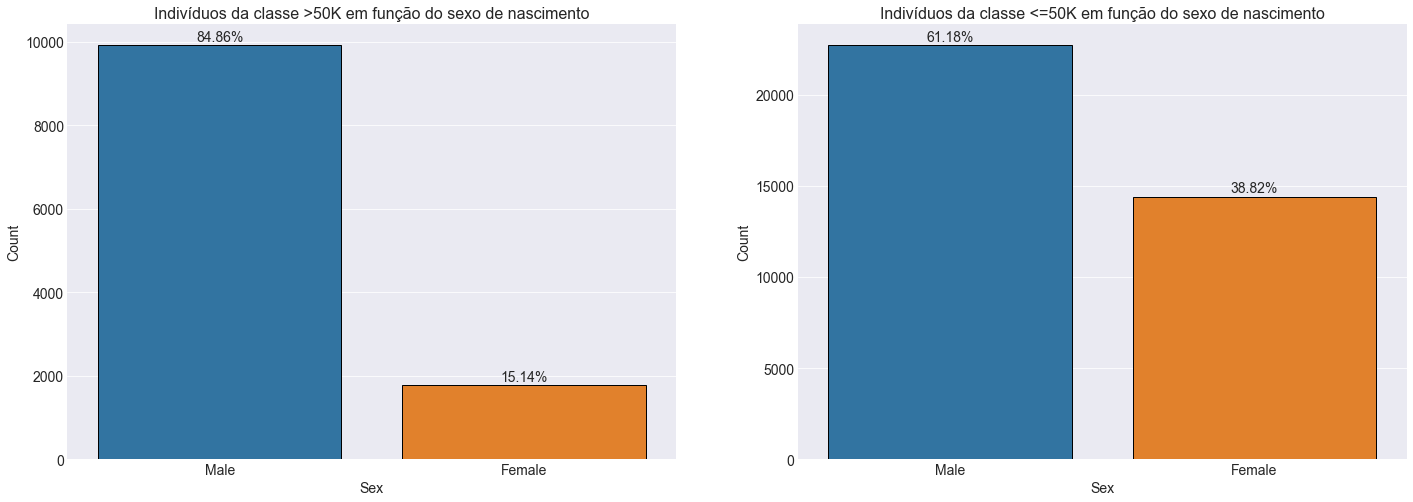

In [19]:
plt.subplots(figsize=(24,8))

plt.subplot(1,2,1)
count=sns.countplot(df[df['class'] == '>50K']['sex'], order = df['sex'].value_counts()[0:20].index, edgecolor='black')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Indivíduos da classe >50K em função do sexo de nascimento', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.subplot(1,2,2)
count=sns.countplot(df[df['class'] == '<=50K']['sex'], order = df['sex'].value_counts()[0:20].index, edgecolor='black')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Indivíduos da classe <=50K em função do sexo de nascimento', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


## **H3:** Negros e outras minorias possuem menos ganhos anuais --> FALSO

A quantidade de pessoas da raça branca no dataset é muito maior que as outras raças, contudo todas as raças possuem distribuição normal quando se analisa os ganhos e as perdas e uma parcela de outliers. Isso demonstra um equilibro nos ganhos e perdas quando se a amostra de cada raça



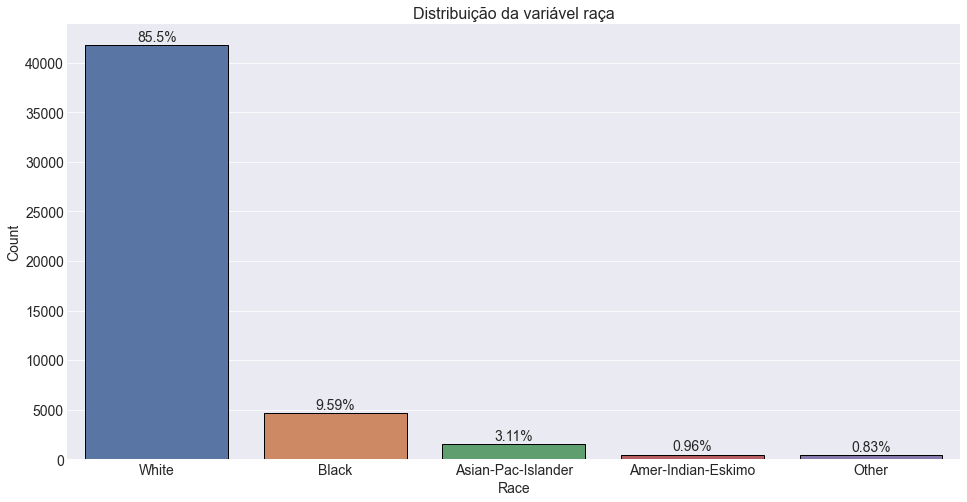

In [20]:
plt.subplots(figsize=(16,8))

count=sns.countplot(df['race'], order = df['race'].value_counts()[0:20].index, edgecolor='black', palette='deep')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Distribuição da variável raça', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

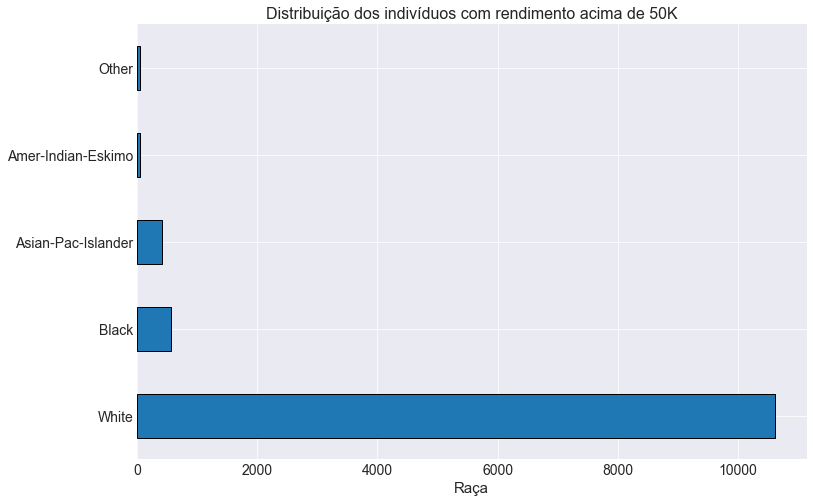

In [21]:
plt.figure(figsize=(12,8))
df[df['class'] == '>50K']['race'].value_counts().plot(kind='barh', edgecolor='black')
plt.xlabel('Raça', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribuição dos indivíduos com rendimento acima de 50K', fontsize=16)
plt.show()

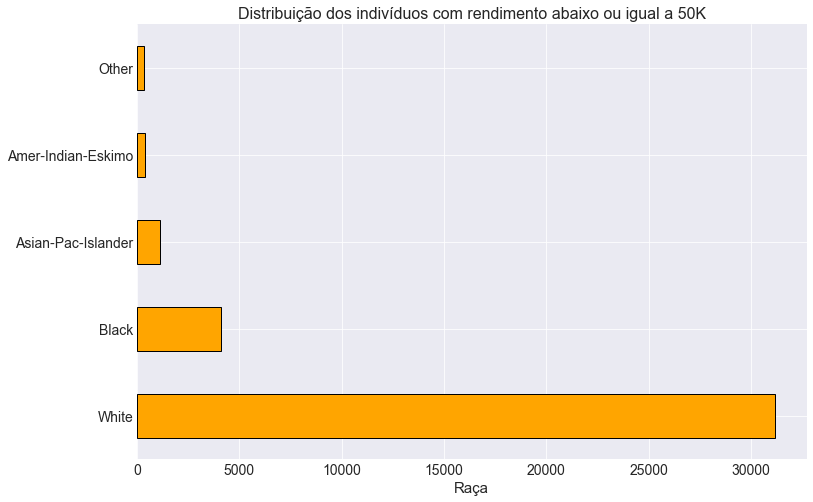

In [22]:
plt.figure(figsize=(12,8))
df[df['class'] == '<=50K']['race'].value_counts().plot(kind='barh', edgecolor='black', color='orange')
plt.xlabel('Raça', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribuição dos indivíduos com rendimento abaixo ou igual a 50K', fontsize=16)
plt.show()

In [23]:
describe_gain =pd.DataFrame([df[df['race']=='White']['capital_gain'].describe(), 
              df[df['race']=='Black']['capital_gain'].describe(), 
              df[df['race']=='Asian-Pac-Islander']['capital_gain'].describe(),
              df[df['race']=='Amer-Indian-Eskimo']['capital_gain'].describe(),
              df[df['race']=='Other']['capital_gain'].describe()], index=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
describe_gain

,count,mean,std,min,25%,50%,75%,max
White,41762.0,1124.479766,7585.319733,0.0,0.0,0.0,0.0,99999.0
Black,4685.0,588.192316,5000.937977,0.0,0.0,0.0,0.0,99999.0
Asian-Pac-Islander,1519.0,1537.266623,10168.845627,0.0,0.0,0.0,0.0,99999.0
Amer-Indian-Eskimo,470.0,538.976596,2680.106448,0.0,0.0,0.0,0.0,27828.0
Other,406.0,983.224138,8650.182481,0.0,0.0,0.0,0.0,99999.0


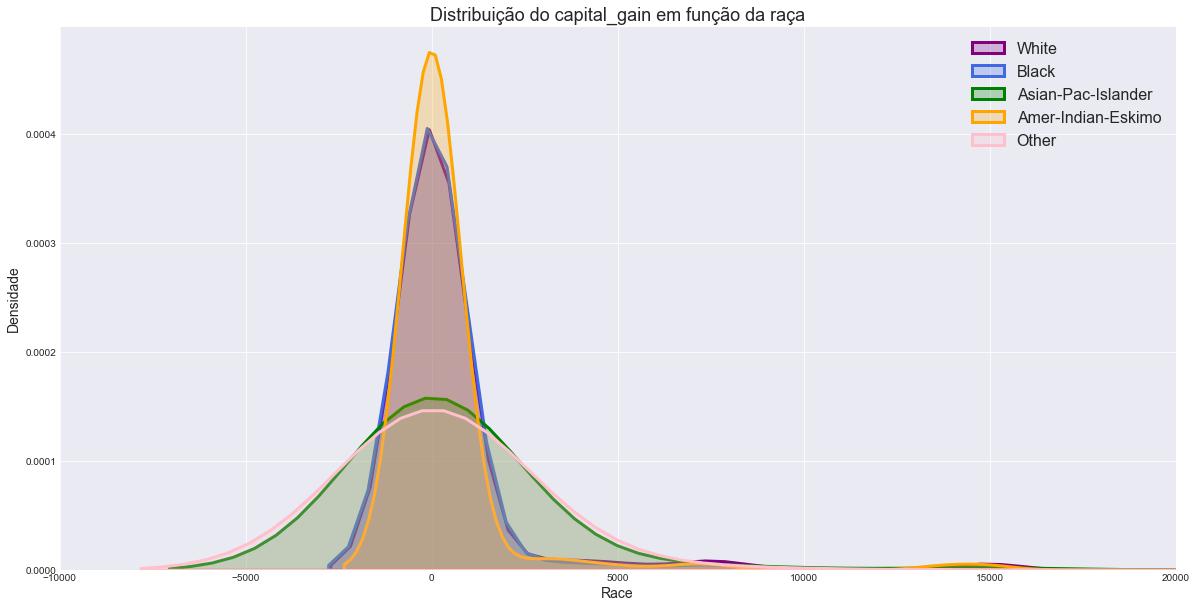

In [24]:
plt.figure(figsize=(20,10))

sns.distplot(df[df['race']=='White']['capital_gain'], hist = False, kde = True,color="purple", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['race']=='Black']['capital_gain'], hist = False, kde = True, color="royalblue", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['race']=='Asian-Pac-Islander']['capital_gain'], hist = False, kde = True, color="green", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['race']=='Amer-Indian-Eskimo']['capital_gain'], hist = False, kde = True, color="orange", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['race']=='Other']['capital_gain'], hist = False, kde = True, color="pink", kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Distribuição do capital_gain em função da raça', fontsize=18)
plt.legend(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.xlim(-10000,20000)
plt.show()

In [25]:
describe_loss = pd.DataFrame([df[df['race']=='White']['capital_loss'].describe(), 
              df[df['race']=='Black']['capital_loss'].describe(), 
              df[df['race']=='Asian-Pac-Islander']['capital_loss'].describe(),
              df[df['race']=='Amer-Indian-Eskimo']['capital_loss'].describe(),
              df[df['race']=='Other']['capital_loss'].describe()], index=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
describe_loss

,count,unique,top,freq
White,41762,95,0.0,39742
Black,4685,50,0.0,4525
Asian-Pac-Islander,1519,33,0.0,1442
Amer-Indian-Eskimo,470,10,0.0,460
Other,406,12,0.0,391


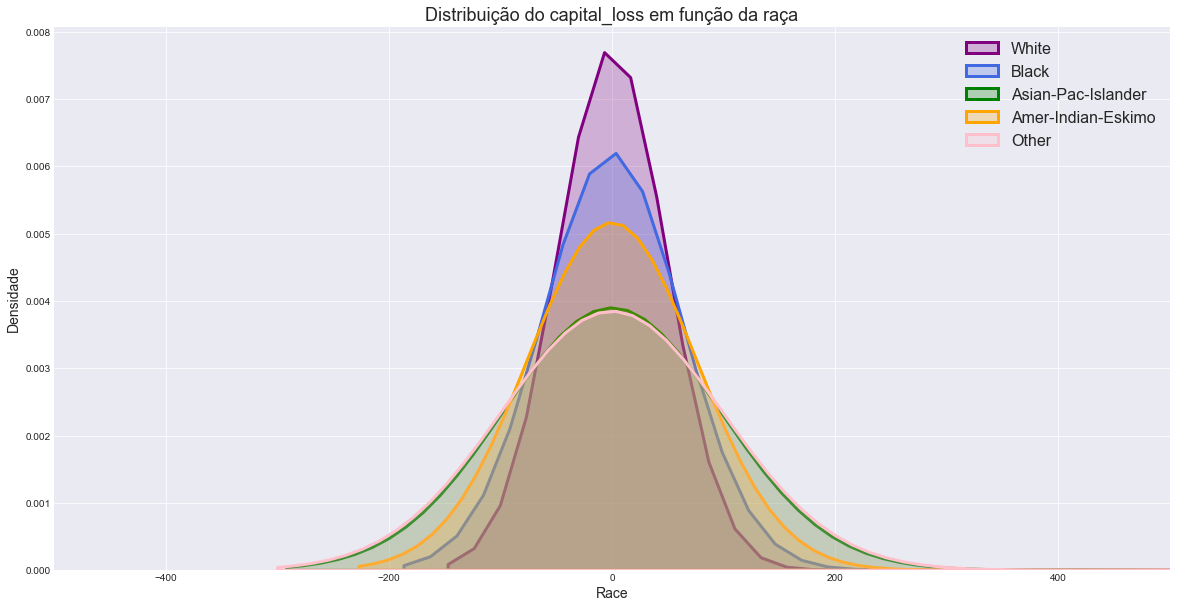

In [26]:
plt.figure(figsize=(20,10))

sns.distplot(df[df['race']=='White']['capital_loss'], hist = False, kde = True,color="purple", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['race']=='Black']['capital_loss'], hist = False, kde = True, color="royalblue", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['race']=='Asian-Pac-Islander']['capital_loss'], hist = False, kde = True, color="green", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['race']=='Amer-Indian-Eskimo']['capital_loss'], hist = False, kde = True, color="orange", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[df['race']=='Other']['capital_loss'], hist = False, kde = True, color="pink", kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Distribuição do capital_loss em função da raça', fontsize=18)
plt.legend(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.xlim(-500,500)
plt.show()

## **H4:** Os anos de escola não necessariamente influenciam nos ganhos anuais --> FALSO

Nível 3 -> 8 a 12 anos de estudo

Nível 4 -> 12 a 14 anos de estudo

Os anos de escola influenciam nos ganhos anuais sim, isso pode ser vistos nos gráficos sequintes onde os níveis 3 e 4 aparecem em grande quantidade principalmente relacionado a classe >50K

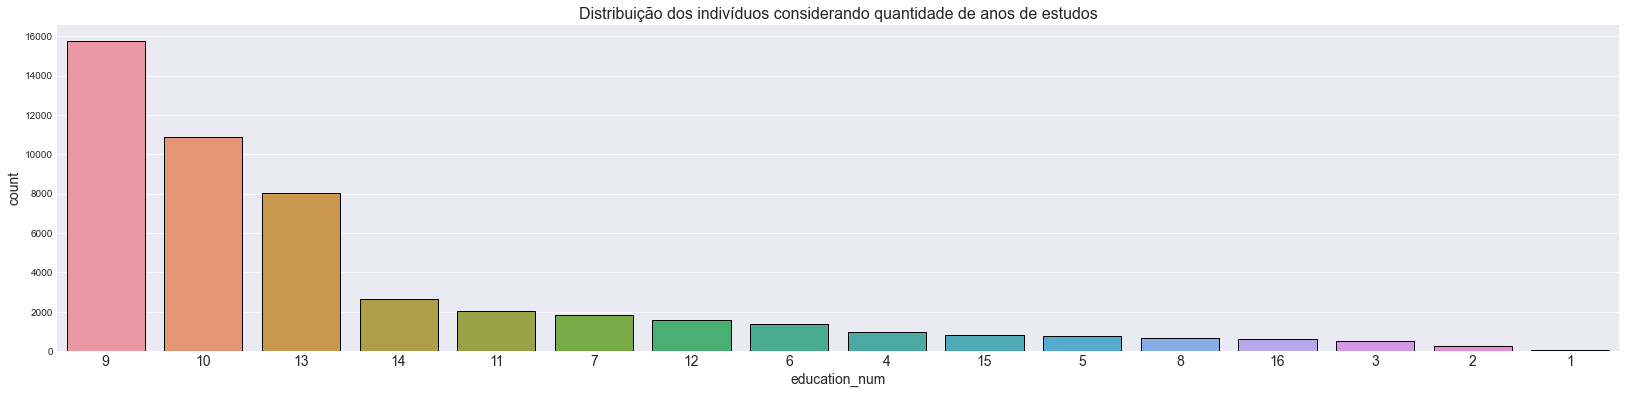

In [27]:
plt.figure(figsize=(28,6))
sns.countplot(x = 'education_num', data=df, order = df['education_num'].value_counts().index, edgecolor='black')
plt.title('Distribuição dos indivíduos considerando quantidade de anos de estudos', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xlabel('education_num', fontsize=14)
plt.show()

In [28]:
df['nivel_estudos'] = df['education_num'].apply(lambda x: 'nivel 1' if 0<x<=5 else('nivel 2' if 5<x<=8 else('nivel 3' if 8<x<=12 else('nivel 4' if 12<x<=14 else 'nivel 5'))))

In [29]:
df[df['class']=='>50K']['nivel_estudos'].unique()

array(['nivel 3', 'nivel 4', 'nivel 5', 'nivel 1', 'nivel 2'],
      dtype=object)

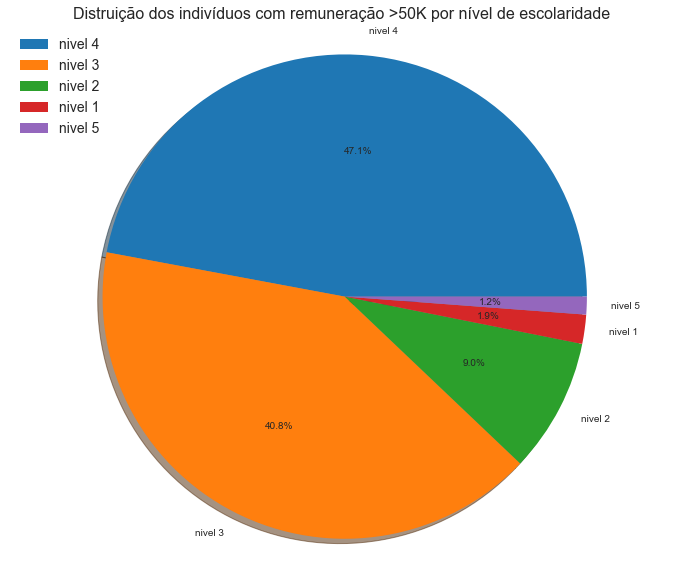

In [30]:
labels = df['nivel_estudos'].unique()

fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(df[df['class']=='>50K']['nivel_estudos'].value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distruição dos indivíduos com remuneração >50K por nível de escolaridade', fontsize=16)
plt.legend(fontsize=14)
plt.show()

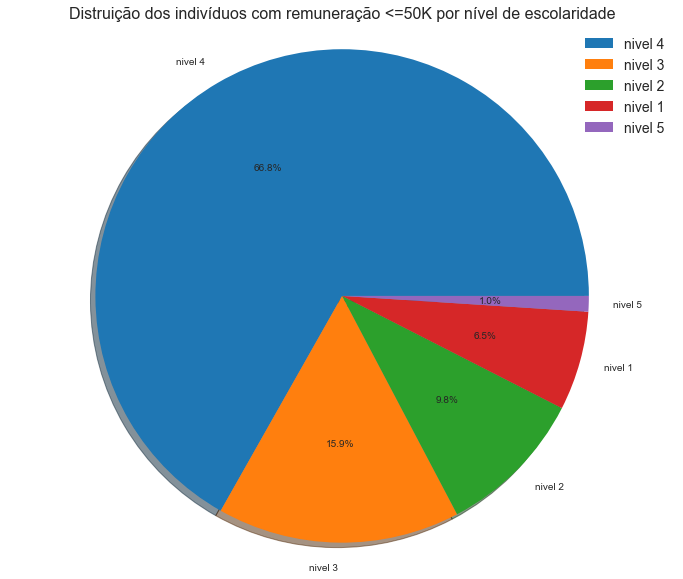

In [31]:
labels = df['nivel_estudos'].unique()

fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(df[df['class']=='<=50K']['nivel_estudos'].value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distruição dos indivíduos com remuneração <=50K por nível de escolaridade', fontsize=16)
plt.legend(fontsize=14)
plt.show()

### O gráfico abaixo mostra o equilíbrio entre o ganho dos indivíduos de acordo com a classe, ou seja as classes 3 e 4 que integram o grupo dos que ganham menos de 50K
tem distribuição normal assim como as outras classes, não há um desequilibro com muitos ganhando pouco ou ganhando muito

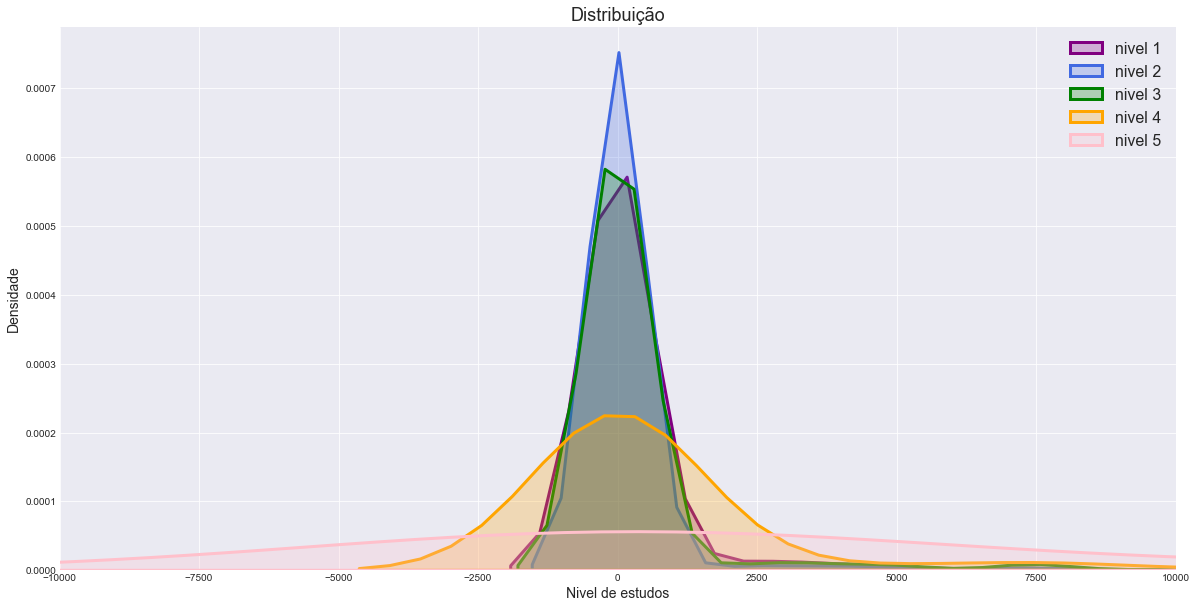

In [32]:
plt.figure(figsize=(20,10))

sns.distplot(df[(df['class'] == '>=50K') | (df['nivel_estudos']== 'nivel 1')]['capital_gain'], hist = False, kde = True,color="purple", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[(df['class'] == '>=50K') | (df['nivel_estudos']== 'nivel 2')]['capital_gain'], hist = False, kde = True, color="royalblue", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[(df['class'] == '>=50K') | (df['nivel_estudos']== 'nivel 3')]['capital_gain'], hist = False, kde = True, color="green", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[(df['class'] == '>=50K') | (df['nivel_estudos']== 'nivel 4')]['capital_gain'], hist = False, kde = True, color="orange", kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(df[(df['class'] == '>=50K') | (df['nivel_estudos']== 'nivel 5')]['capital_gain'], hist = False, kde = True, color="pink", kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Distribuição', fontsize=18)
plt.legend(['nivel 1', 'nivel 2', 'nivel 3', 'nivel 4', 'nivel 5'], fontsize=16)
plt.xlabel('Nivel de estudos', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.xlim(-10000,10000)
plt.show()

### Percebe-se pelo gráfico a distribuição da idade dos indivíduos que é exatamente o retrato da população econômicamente ativa de muitos lugares. A medida que os indivíduos 
### possuem maior idade diminui a quantidade dos mesmos na população economicamente ativa

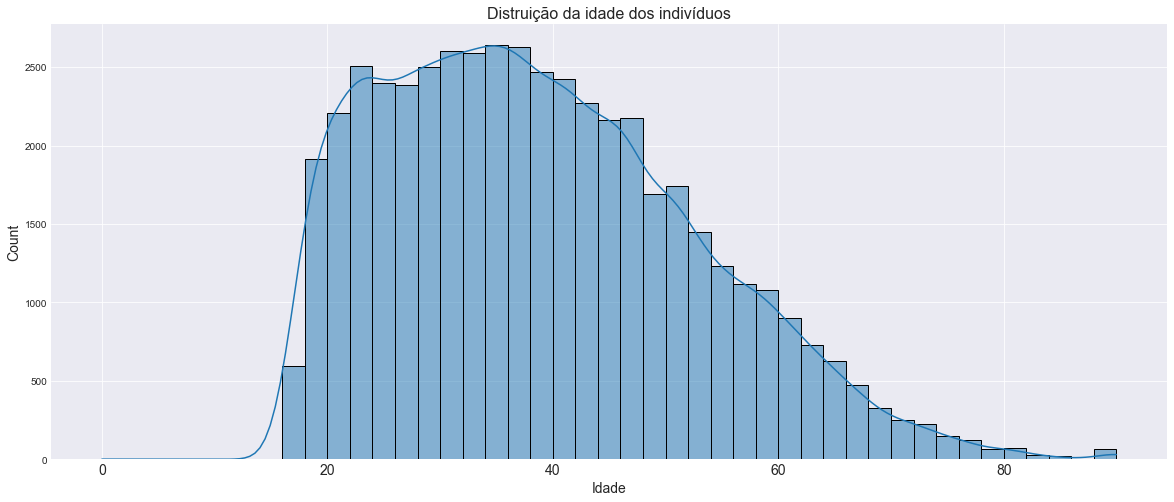

In [33]:
plt.figure(figsize=(20,8))

sns.histplot(x='age', data=df, bins=45, kde = True)
plt.xlabel('Anos de uso')
plt.title('Distruição da idade dos indivíduos', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.show()

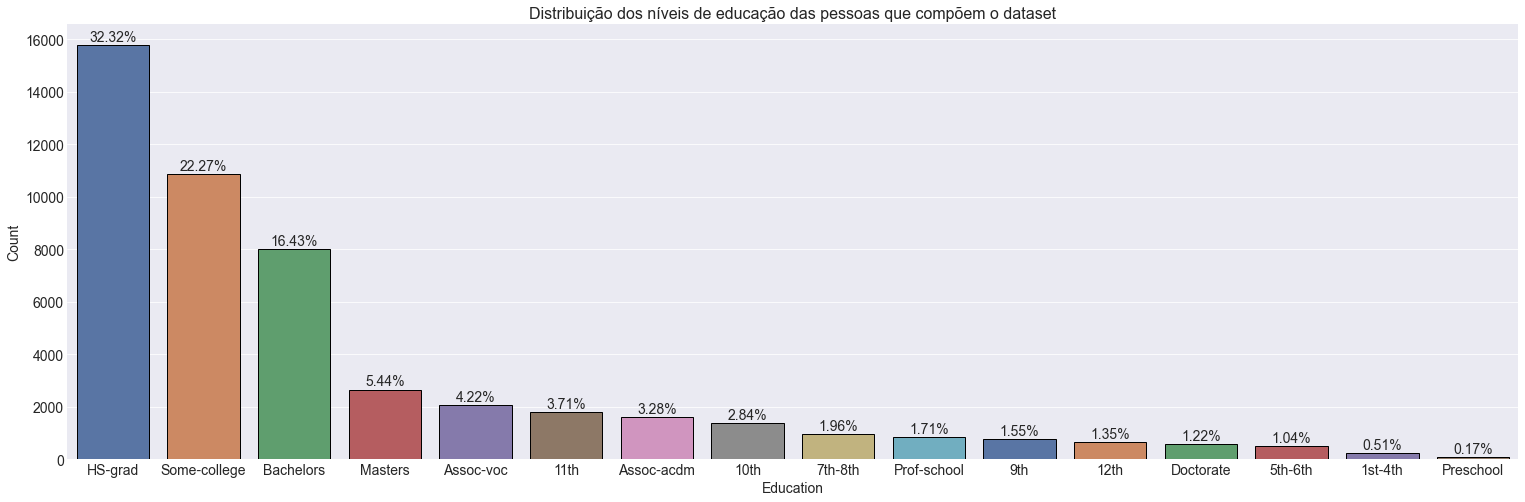

In [34]:
plt.subplots(figsize=(26,8))

count=sns.countplot(df['education'], order = df['education'].value_counts()[0:20].index, edgecolor='black', palette='deep')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Distribuição dos níveis de educação das pessoas que compõem o dataset', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## **H5:** Maior número de horas de trabalho por semana não necessariamente indicam maiores ganhos --> VERDADEIRO

A grande maioria do grupo com ganhos acima de 50K trabalha 40 semanais

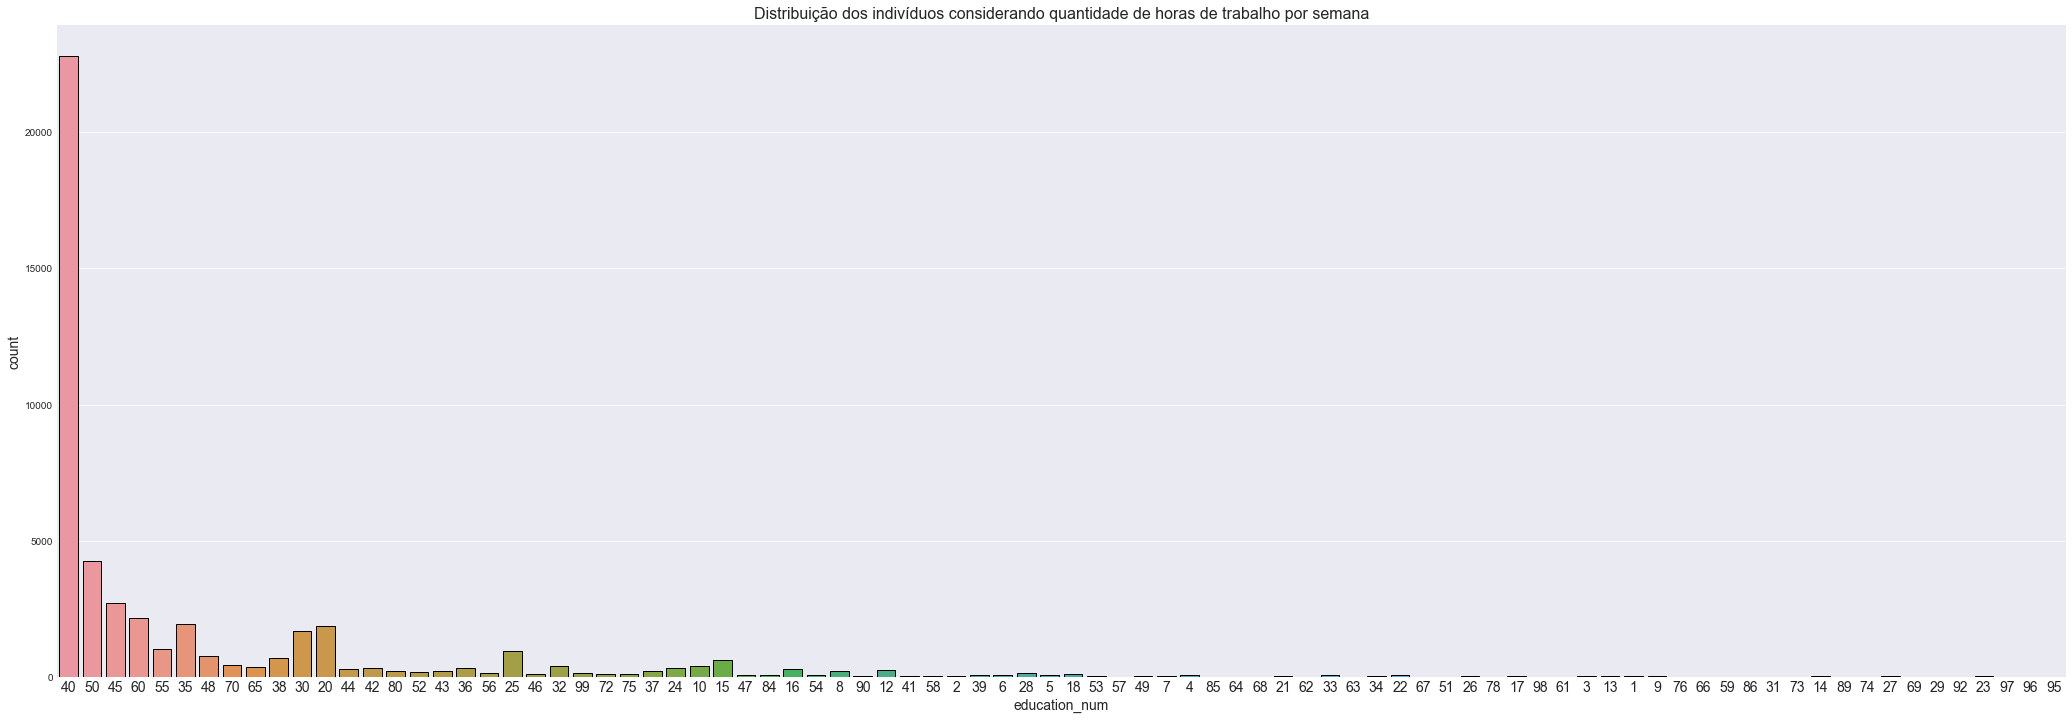

In [142]:
plt.figure(figsize=(36,12))
sns.countplot(x = 'hours_per_week', data=df, order = df[df['class']=='>50K']['hours_per_week'].value_counts().index, edgecolor='black')
plt.title('Distribuição dos indivíduos considerando quantidade de horas de trabalho por semana', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xlabel('education_num', fontsize=14)
plt.show()

In [36]:
df['nivel_trabalho'] = df['hours_per_week'].apply(lambda x: 'muito baixo' if x<=10 else('baixo' if 10<x<=20 else('meio' if 20<x<=30 else('alto' if 30<x<=40 else('muito alto' if 40<x<=50 else 'extremo')))))

In [100]:
df['faixa_etaria'] = df['age'].apply(lambda x: 'adulto 1' if x<30 else('adulto 2' if 30<=x<40 else('adulto 3' if 40<=x<55 else('adulto 4'))))

In [101]:
list(df['faixa_etaria'].unique())

['adulto 2', 'adulto 3', 'adulto 1', 'adulto 4']

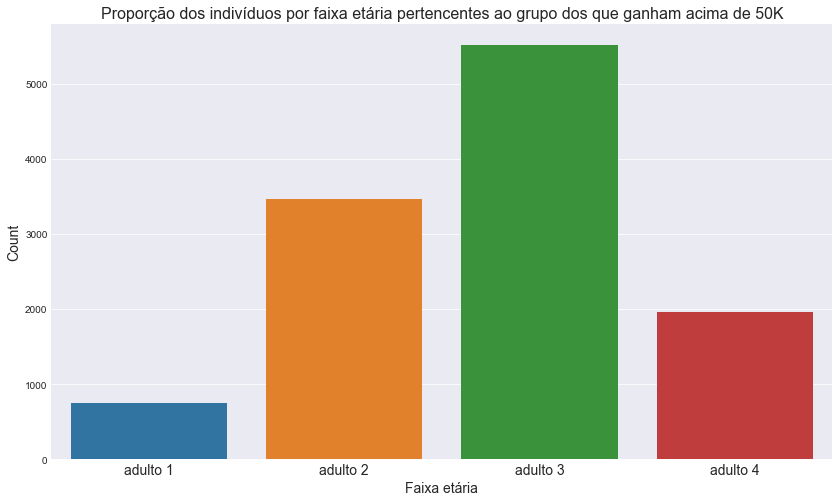

In [104]:
plt.figure(figsize=(14,8))
tt = df[df['class']=='>50K']['faixa_etaria']
sns.countplot(tt, order=['adulto 1', 'adulto 2', 'adulto 3', 'adulto 4'])
plt.xticks(fontsize=14)
plt.title('Proporção dos indivíduos por faixa etária pertencentes ao grupo dos que ganham acima de 50K', fontsize=16)
plt.xlabel('Faixa etária', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [38]:
df['white'] = df['race'].apply(lambda x: 1 if x == 'White' else 0)

In [39]:
df['not_white'] = df['race'].apply(lambda x: 0 if x == 'White' else 1)

In [40]:
df['male'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

In [41]:
df['not_male'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)

In [42]:
df['white_male'] = df['male']*df['white']

In [43]:
df['white_female'] = df['not_male']*df['white']

In [44]:
df['not_white_male'] = df['not_white']*df['male']

In [45]:
df['not_white_female'] =  df['not_white']*df['not_male']

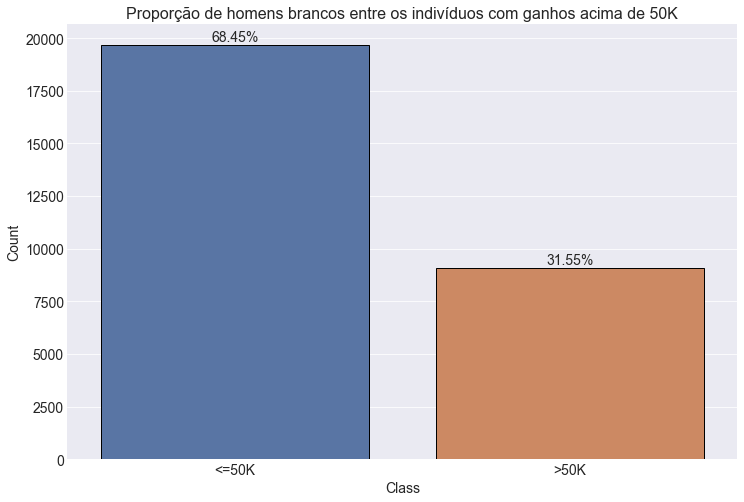

In [56]:
plt.subplots(figsize=(12,8))

count=sns.countplot(df[df['white_male']==1]['class'], edgecolor='black', palette='deep')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Proporção de homens brancos entre os indivíduos com ganhos acima de 50K', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

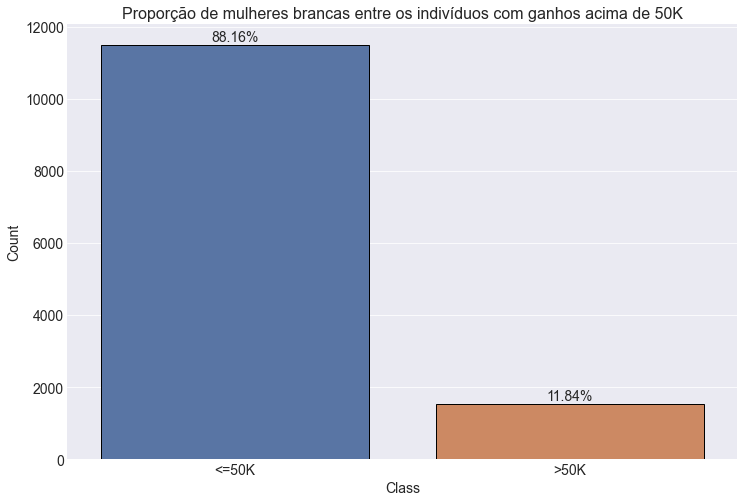

In [77]:
plt.subplots(figsize=(12,8))

count=sns.countplot(df[df['white_female']==1]['class'], edgecolor='black', palette='deep')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Proporção de mulheres brancas entre os indivíduos com ganhos acima de 50K', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

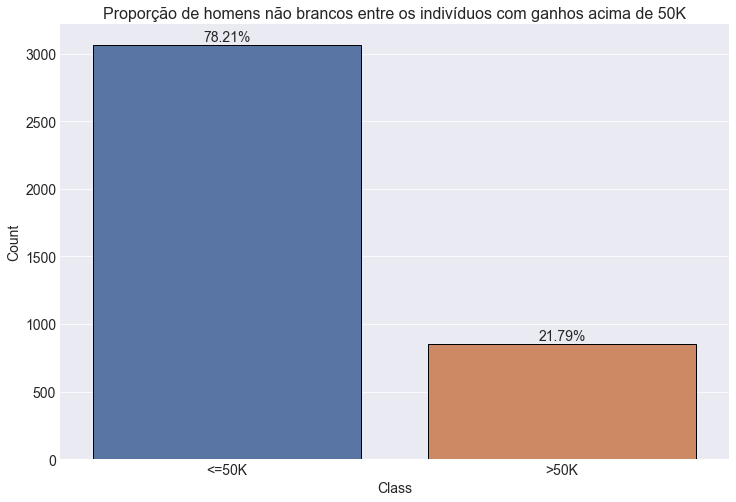

In [78]:
plt.subplots(figsize=(12,8))

count=sns.countplot(df[df['not_white_male']==1]['class'], edgecolor='black', palette='deep')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Proporção de homens não brancos entre os indivíduos com ganhos acima de 50K', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

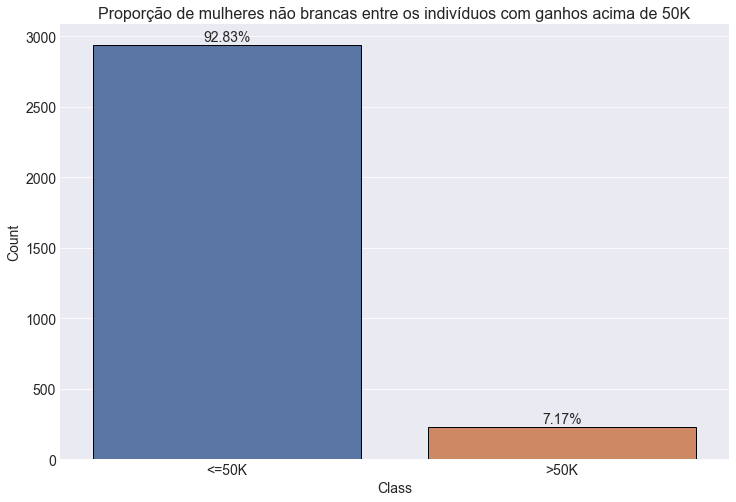

In [79]:
plt.subplots(figsize=(12,8))

count=sns.countplot(df[df['not_white_female']==1]['class'], edgecolor='black', palette='deep')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Proporção de mulheres não brancas entre os indivíduos com ganhos acima de 50K', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## **H6/H7:** Indivíduos com alguma relação com as forças armadas possuem maiores ganhos anuais --> FALSO

Ainda que eles componham 11% dos indivíduos com ganhos acima de 50K, não se pode dizer que ele possuem maiores ganhos do que outros profissionais

O dataset não define muito bem as área, é mais focado nas posições dos profissionais em termos de segmentos mais gerais e cargos. Devido a isso
acaba não sendo tão conclusivo

In [121]:
tt = df[df['class']=='>50K']['occupation'].value_counts()

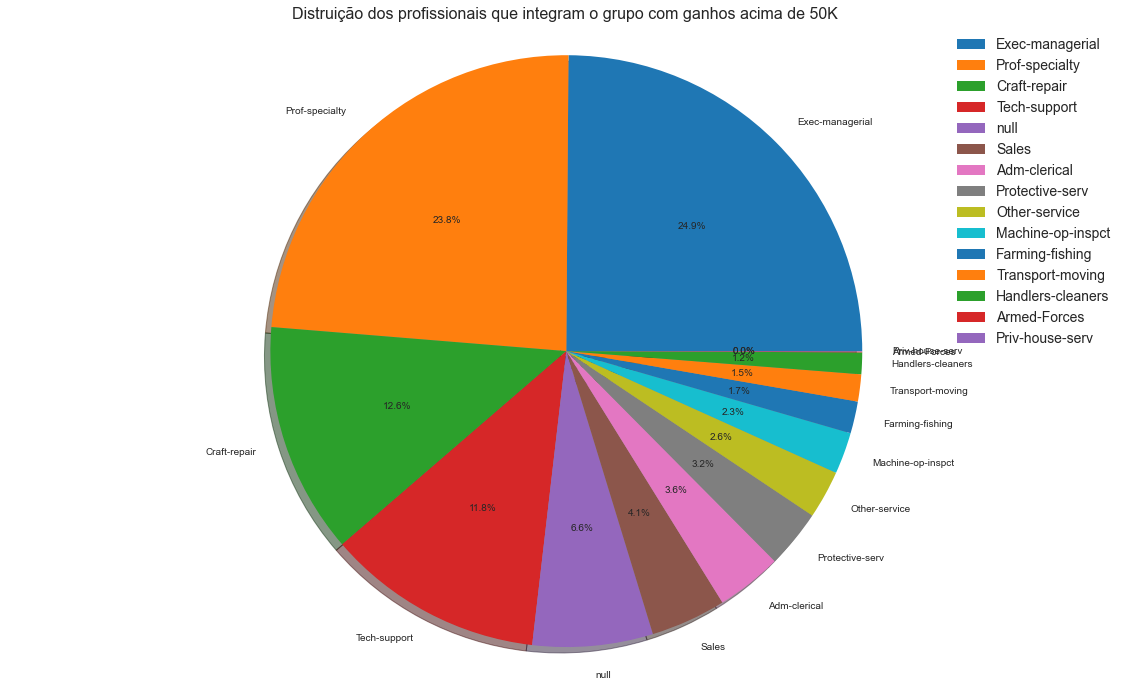

In [128]:
labels = df[df['class']=='>50K']['occupation'].unique()
fig1, ax1 = plt.subplots(figsize=(20,12))
ax1.pie(tt, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distruição dos profissionais que integram o grupo com ganhos acima de 50K', fontsize=16)
plt.legend(fontsize=14)
plt.show()

## **H8:** Indivíduos fora de um relacionamento possuem maiores ganhos --> FALSO

Essa hipótese se mostrou falsa uma vez que a grande maioria dos indivíduos do grupo com ganhos acima de 50K são maridos em seus relacionamentos

In [126]:
rr = df[df['class']=='>50K']['relationship'].value_counts()

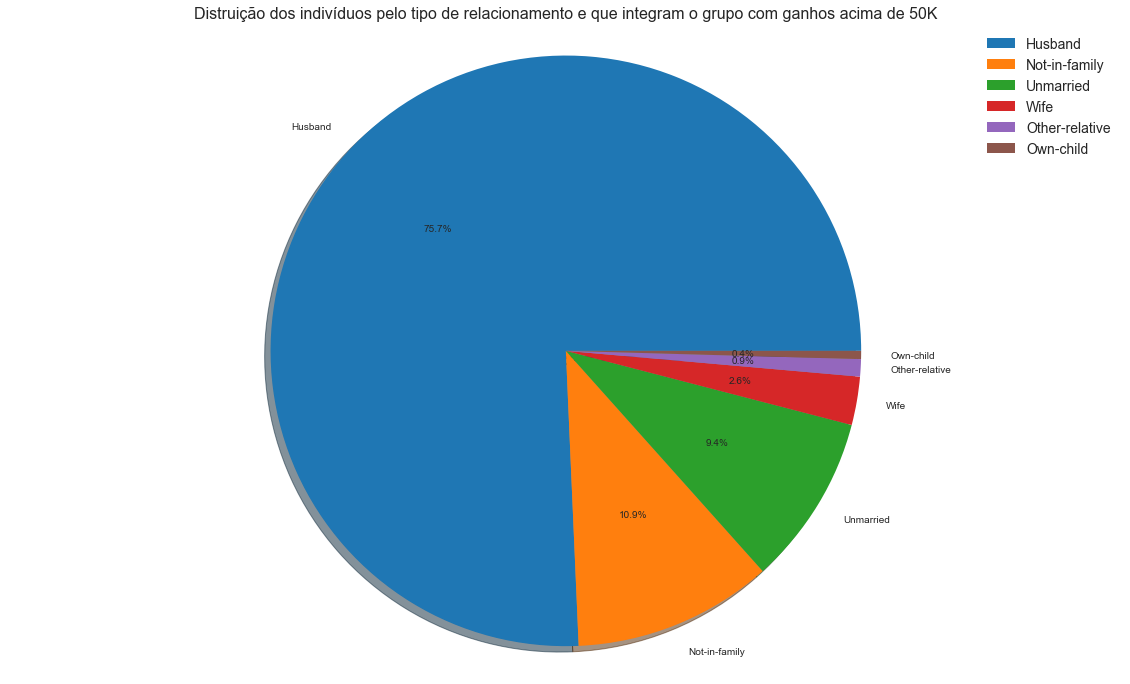

In [131]:
labels = df[df['class']=='>50K']['relationship'].unique()
fig1, ax1 = plt.subplots(figsize=(20,12))
ax1.pie(rr, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distruição dos indivíduos pelo tipo de relacionamento e que integram o grupo com ganhos acima de 50K', fontsize=16)
plt.legend(fontsize=14)
plt.show()

## **H9:** Indivíduos americanos possuem maiores ganhos comparados a outras nacionalidades

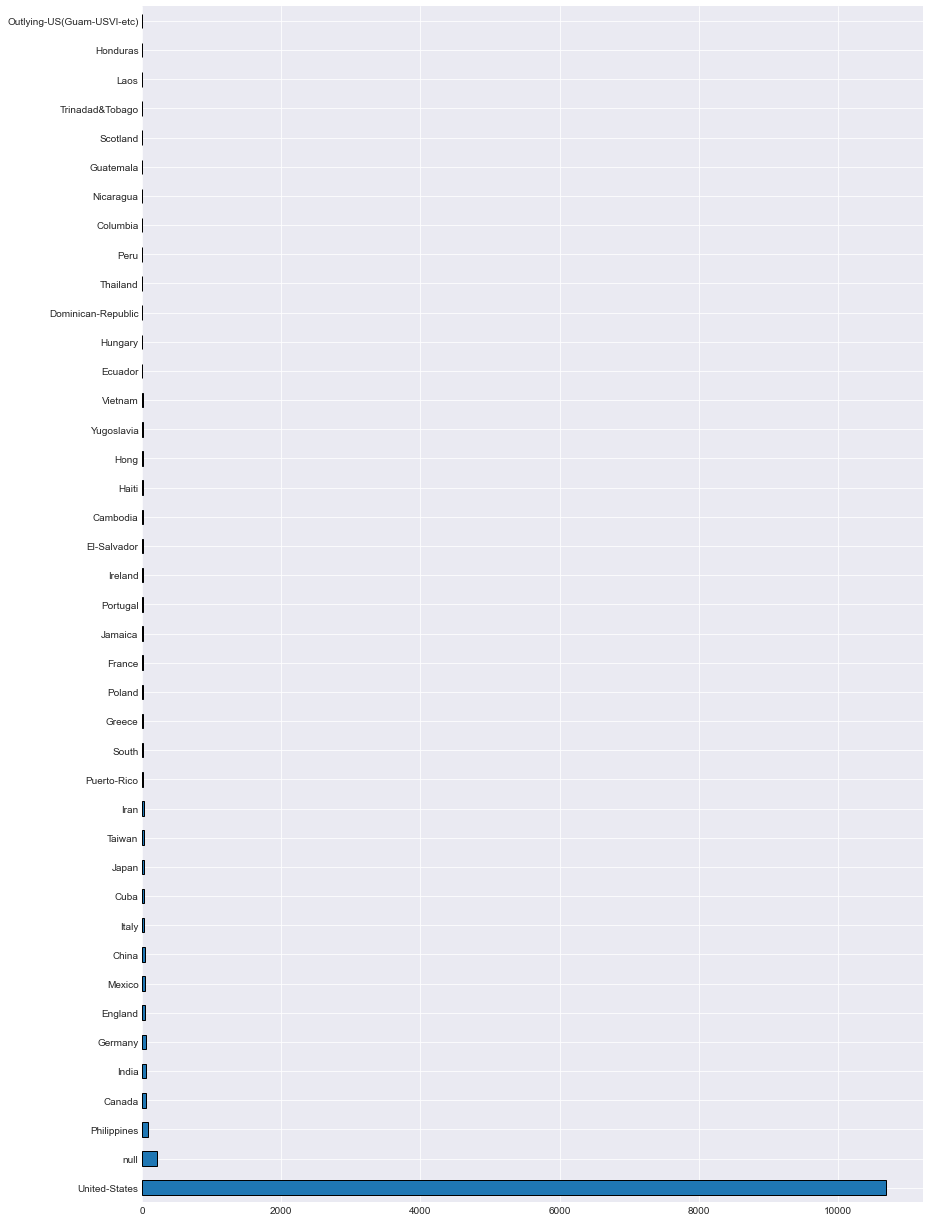

In [140]:
plt.figure(figsize=(14,22))
df[df['class']=='>50K']['native_country'].value_counts().plot(kind='barh', edgecolor='black')
plt.show()

**H1:** A maioria dos indivíduos trabalham na iniciativa privada --> VERDADEIRO

**H2:** Mulheres possuem menos ganhos anuais --> VERDADEIRO

**H3:** Negros e outras minorias possuem menos ganhos anuais --> VERDADEIRO

**H4:** Os anos de escola não necessariamente influenciam nos ganhos anuais --> FALSO

**H5:** Maior número de horas de trabalho por semana não necessariamente indicam maiores ganhos --> VERDADEIRO

**H6:** Profissões ligadas a área de tecnologia proporcionam maiores ganhos --> FALSO

**H7:** Indivíduos com alguma relação com as forças armadas possuem maiores ganhos anuais --> FALSO

**H8:** Indivíduos fora de um relacionamento possuem maiores ganhos --> FALSO

**H9:** Indivíduos americanos possuem maiores ganhos comparados a outras nacionalidades --> VERDADEIRO

In [35]:
df['class'] = df['class'].apply(lambda x: 1 if x == '>50K' else 0)

In [37]:
categorical_features = df.select_dtypes(exclude=[np.number])
numerical_features = df.select_dtypes(include=[np.number])

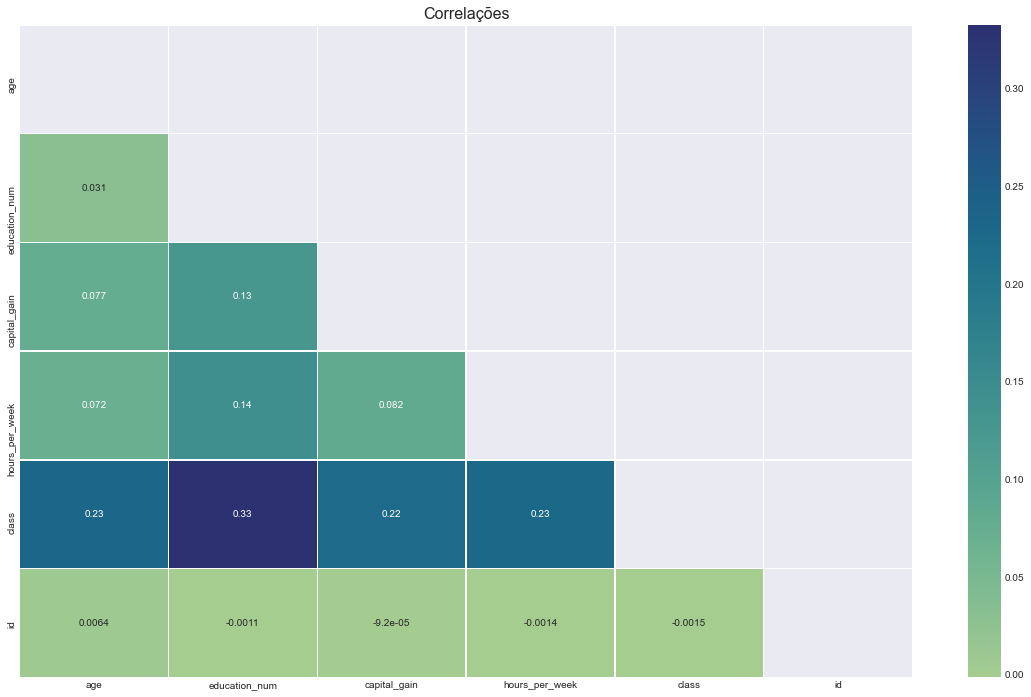

In [40]:
# calculando correlações
correlations = numerical_features.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 12)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlations, cmap="crest", mask=mask, linewidths=.5, annot=True)
plt.title('Correlações', fontsize=16)

# displays the plot
plt.show()

### Análise de multicolinearidade

Não existe colinaridade entre as variáveis, os valores do VIF ficaram no máximo em 10 e isso é aceitável
Vai de encontro com o gráfico de correlação, pois não vemos neste gráfico variáveis com correlações muito altas

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [65]:
numerical_features.columns

Index(['age', 'education_num', 'capital_gain', 'hours_per_week', 'class',
       'id'],
      dtype='object')

In [67]:
df_vif = numerical_features.drop(['class'], axis=1)

In [68]:
df_vif = df_vif.dropna()

In [69]:
calc_vif(df_vif)

,variables,VIF
0,age,7.286579
1,education_num,10.786622
2,capital_gain,1.031294
3,hours_per_week,9.591087
4,id,3.646988
